# Salience of immigration and climate in individual parties

This script is only an exploratory analysis of the salience the two issues gained in the political communication of the two parties. It has been used to better understand the political leanings breakdown of the salience analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator

## Initialise
Party name list, import parties df and time counts empty df

In [2]:
party_names = ['EELV', 'FI', 'LR', 'MoDem', 'PS', 'PCF', 'LREM', 'RN']

In [22]:
df_parties = pd.read_csv('/.../parties_tweets_with_topic_model_debates.zip',compression='zip')

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_42458/945660413.py:1: DtypeWarning: Columns (45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_parties = pd.read_csv('/Users/giovanni/masterthesis/7_Salience_monthly/parties_tweets_with_topic_model_debates.zip',compression='zip')


In [8]:
time_counts_df = pd.read_csv('/.../general_time_periods_df.csv')

## Calculate counts and salience

In [24]:
for party in party_names:
    temp_df = df_parties[df_parties.party_name == party]
    
    time_counts_df[f'imm_count_{party}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='immigration'].groupby('time_period').size())
    time_counts_df[f'clim_count_{party}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='climate'].groupby('time_period').size())
    time_counts_df[f'tot_tweets_count_{party}']= time_counts_df['time_period'].map(temp_df.groupby('time_period').size())
    
    time_counts_df[f'imm_salience_{party}'] = time_counts_df[f'imm_count_{party}'] /time_counts_df[f'tot_tweets_count_{party}']
    time_counts_df[f'clim_salience_{party}'] = time_counts_df[f'clim_count_{party}']/time_counts_df[f'tot_tweets_count_{party}']

In [26]:
time_counts_df.fillna(0, inplace=True)

In [27]:
time_counts_df.head()

,time_period,start_date,end_date,imm_count_EELV,clim_count_EELV,tot_tweets_count_EELV,imm_salience_EELV,clim_salience_EELV,imm_count_FI,clim_count_FI,...,imm_count_LREM,clim_count_LREM,tot_tweets_count_LREM,imm_salience_LREM,clim_salience_LREM,imm_count_RN,clim_count_RN,tot_tweets_count_RN,imm_salience_RN,clim_salience_RN
0,1,2017-01-01,2017-01-31,4.0,5,43,0.093023,0.116279,1.0,1.0,...,0.0,0.0,57,0.000000,0.000000,21,1.0,459,0.045752,0.002179
1,2,2017-01-31,2017-03-02,0.0,3,18,0.000000,0.166667,2.0,88.0,...,0.0,6.0,101,0.000000,0.059406,31,1.0,606,0.051155,0.001650
2,3,2017-03-02,2017-04-01,1.0,3,15,0.066667,0.200000,4.0,4.0,...,2.0,4.0,168,0.011905,0.023810,34,2.0,656,0.051829,0.003049
3,4,2017-04-01,2017-05-01,7.0,3,21,0.333333,0.142857,8.0,4.0,...,3.0,1.0,249,0.012048,0.004016,49,1.0,647,0.075734,0.001546
4,5,2017-05-01,2017-05-31,0.0,13,32,0.000000,0.406250,3.0,5.0,...,1.0,2.0,203,0.004926,0.009852,16,2.0,470,0.034043,0.004255


## Save

In [28]:
time_counts_df.to_csv('/.../4_individual_parties_salience_across_time_counts.csv', index = False)

# Plotting

In [29]:
plot_df = time_counts_df.copy()
plot_df = plot_df.set_index('start_date')

In [30]:
colors = {"FI" : "blueviolet", 
                  "PCF" : "red",                 
                  "PRG":"firebrick",
                  "PS":"lightcoral",
                  "LC":"aqua",
                  "MoDem" : "orange",
                  "LREM":"gold",
                  "LR":"blue",
                  "RN": "black", 
                  "EELV":"limegreen"}

In [31]:
def plot_trends(column, parties, debate):
    fig, ax1 = plt.subplots(figsize=(10, 4))

    for party in parties:
        ax1.plot(plot_df[f'{column}_{party}'], linestyle='-', color=colors[party], label=party)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Salience', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True)

    fig.legend(loc='right',bbox_to_anchor=(1.05,0.5))
    plt.setp(ax1.get_xticklabels(), rotation=90)
    if len(parties) == 8:
        plt.title(f'Salience of {debate} over time – Parties (All)')
    else: 
        plt.title(f'Salience of {debate} over time – {parties}')
    ax1.xaxis.set_major_locator(MultipleLocator(60))
    plt.show()

## Immigration

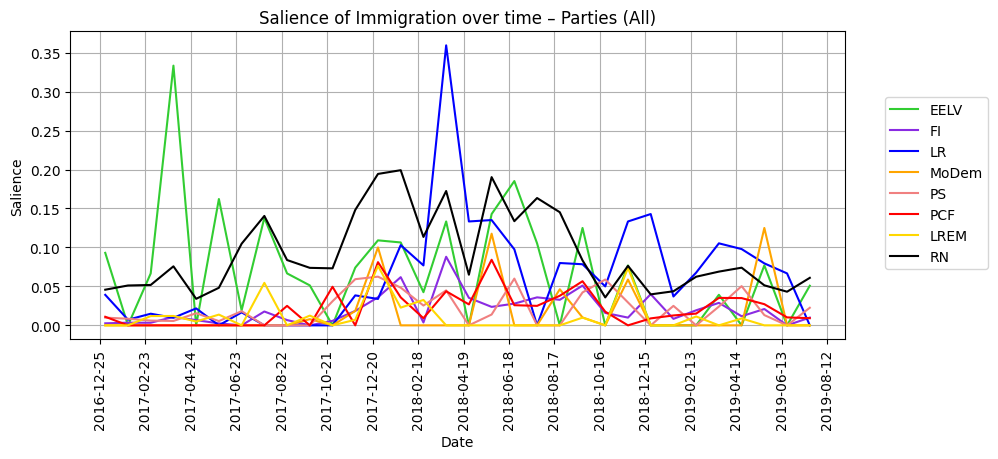

In [32]:
plot_trends('imm_salience', party_names, 'Immigration')

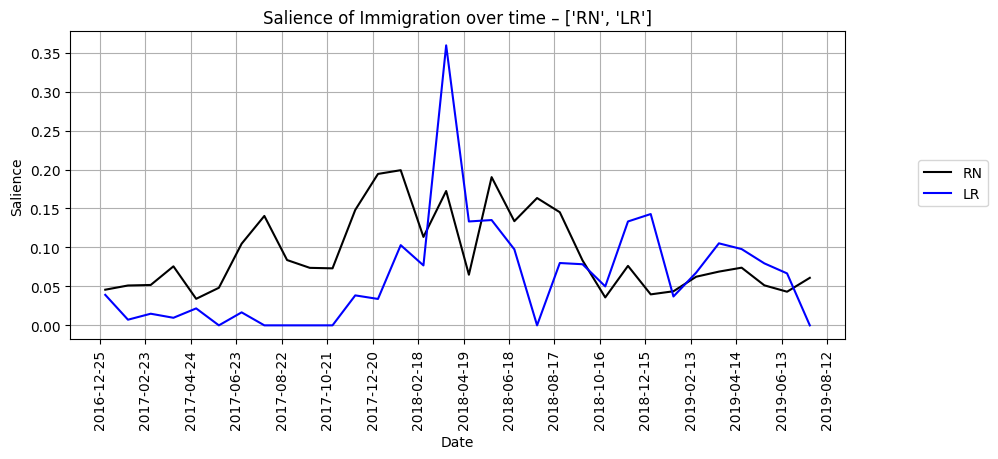

In [35]:
plot_trends('imm_salience', ['RN', 'LR'], 'Immigration')

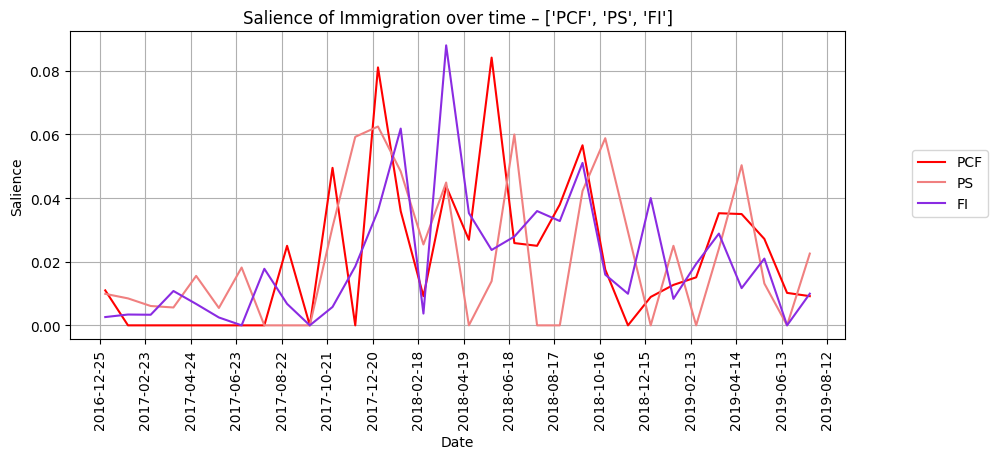

In [36]:
plot_trends('imm_salience', ['PCF', 'PS', 'FI'], 'Immigration')

## Climate

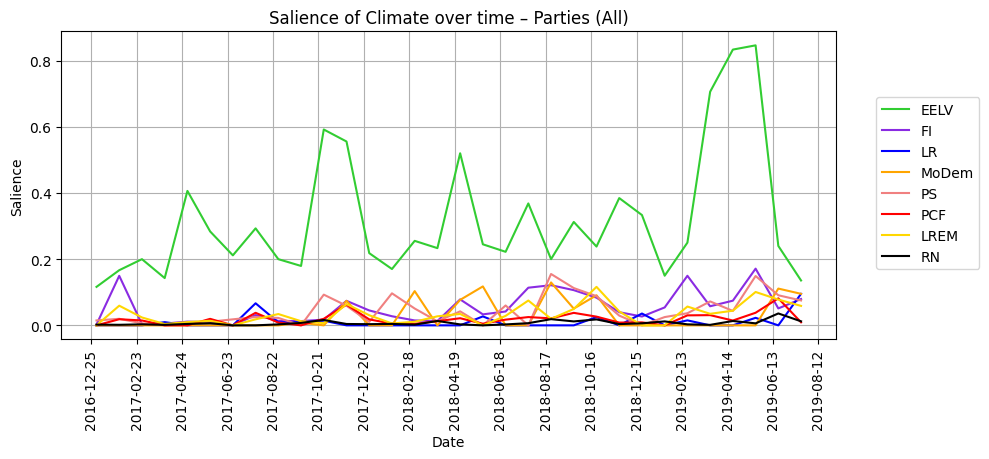

In [37]:
plot_trends('clim_salience', party_names, 'Climate')

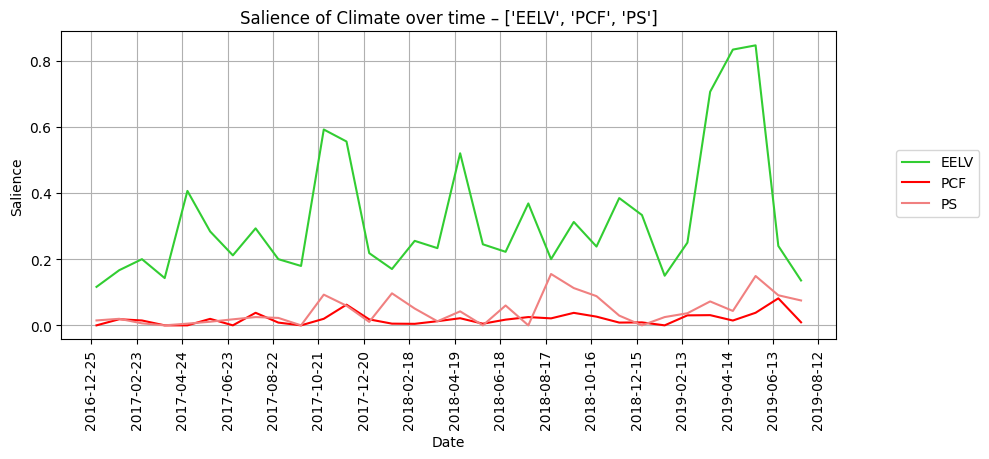

In [38]:
plot_trends('clim_salience', ['EELV', 'PCF', 'PS'], 'Climate')

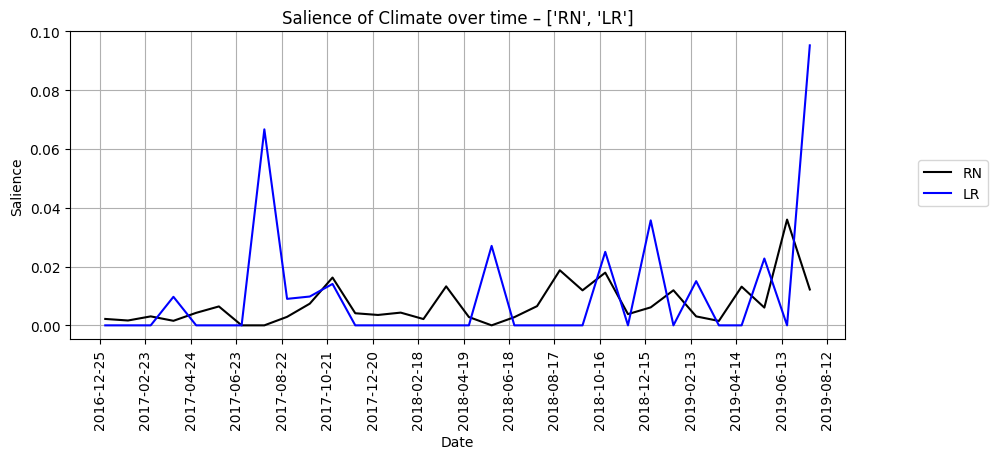

In [39]:
plot_trends('clim_salience', ['RN', 'LR'], 'Climate')